In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../../data/raw/diamonds_train.csv')
to_predict = pd.read_csv('../../data/raw/diamonds_predict.csv')

In [3]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [4]:
train.shape #info para entrenar nuestro modelo

(40455, 10)

In [5]:
to_predict.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [6]:
to_predict.shape #diamantes a predecir

(13485, 10)

## Naive model

In [7]:
train['price'].mean()

3928.444469163268

In [8]:
submission = pd.DataFrame({'id': to_predict.id, 'price': train['price'].mean()})

In [12]:
submission.to_csv('../../data/results/naive_submission.csv', index=False)

In [9]:
submission

,id,price
0,0,3928.444469
1,1,3928.444469
2,2,3928.444469
3,3,3928.444469
4,4,3928.444469
...,...,...
13480,13480,3928.444469
13481,13481,3928.444469
13482,13482,3928.444469
13483,13483,3928.444469


## Simple model with Linear Regression

In [10]:
 train

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [11]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

In [12]:
X = train[num_features].values
X

array([[ 1.21, 62.4 , 58.  ,  6.83,  6.79,  4.25],
       [ 0.32, 63.  , 57.  ,  4.35,  4.38,  2.75],
       [ 0.71, 65.5 , 55.  ,  5.62,  5.53,  3.65],
       ...,
       [ 1.01, 62.7 , 56.  ,  6.37,  6.42,  4.01],
       [ 0.33, 61.9 , 54.3 ,  4.45,  4.47,  2.76],
       [ 1.24, 62.  , 58.  ,  6.83,  6.88,  4.25]])

In [13]:
y = train[target].values
y

array([4268,  505, 2686, ..., 5457,  456, 6232])

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X, y)

LinearRegression()

In [17]:
X_predict = to_predict[num_features].values

In [18]:
to_predict[num_features].values

array([[ 0.79, 62.7 , 60.  ,  5.82,  5.89,  3.67],
       [ 1.2 , 61.  , 57.  ,  6.81,  6.89,  4.18],
       [ 1.57, 62.2 , 61.  ,  7.38,  7.32,  4.57],
       ...,
       [ 0.7 , 61.6 , 55.  ,  5.75,  5.71,  3.53],
       [ 0.7 , 58.8 , 57.  ,  5.85,  5.89,  3.45],
       [ 0.4 , 62.4 , 55.  ,  4.7 ,  4.73,  2.94]])

In [19]:
submission = pd.DataFrame({'id': to_predict.id, 
                           'price': model.predict(to_predict[num_features].values)})

In [20]:
submission

,id,price
0,0,3284.839761
1,1,7105.705286
2,2,9689.561043
3,3,4509.703954
4,4,1291.684607
...,...,...
13480,13480,2077.266355
13481,13481,3174.877091
13482,13482,3138.541972
13483,13483,3398.941026


#### Optimizar a mano

In [21]:
train.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


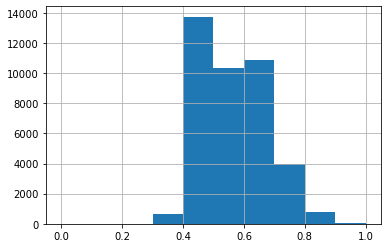

In [22]:
(train['x'] / train['x'].max()).hist()

In [23]:
(train['x'] / train['x'].mean()) / train['x'].std()

0        1.060159
1        0.675211
2        0.872342
3        0.726434
4        1.016697
           ...   
40450    1.102069
40451    1.289886
40452    0.988757
40453    0.690733
40454    1.060159
Name: x, Length: 40455, dtype: float64

### Simple model Linear Regression with StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(train[num_features].values)

StandardScaler()

In [27]:
scaler.mean_

array([ 0.7977056 , 61.75284143, 57.44613274,  5.72939167,  5.73281869,
        3.53715363])

In [28]:
pd.DataFrame(scaler.transform(train[num_features]), columns = num_features)

,carat,depth,table,x,y,z
0,0.867006,0.452019,0.247981,0.978807,0.921985,1.022657
1,-1.004557,0.871099,-0.199745,-1.226738,-1.179816,-1.129259
2,-0.184434,2.617265,-1.095198,-0.097286,-0.176882,0.161891
3,-0.815298,1.429872,-0.647472,-0.933258,-0.883296,-0.770607
4,0.467458,-0.875068,0.695707,0.729794,0.677793,0.592274
...,...,...,...,...,...,...
40450,1.140380,0.661559,-0.199745,1.218927,1.140014,1.280887
40451,2.570338,-3.249854,1.143433,2.295019,2.195276,1.711271
40452,0.446430,0.661559,-0.647472,0.569714,0.599302,0.678351
40453,-0.983529,0.102785,-1.408606,-1.137805,-1.101325,-1.114913


In [29]:
X_scaled = pd.DataFrame(scaler.transform(train[num_features]))

In [30]:
X_scaled

,0,1,2,3,4,5
0,0.867006,0.452019,0.247981,0.978807,0.921985,1.022657
1,-1.004557,0.871099,-0.199745,-1.226738,-1.179816,-1.129259
2,-0.184434,2.617265,-1.095198,-0.097286,-0.176882,0.161891
3,-0.815298,1.429872,-0.647472,-0.933258,-0.883296,-0.770607
4,0.467458,-0.875068,0.695707,0.729794,0.677793,0.592274
...,...,...,...,...,...,...
40450,1.140380,0.661559,-0.199745,1.218927,1.140014,1.280887
40451,2.570338,-3.249854,1.143433,2.295019,2.195276,1.711271
40452,0.446430,0.661559,-0.647472,0.569714,0.599302,0.678351
40453,-0.983529,0.102785,-1.408606,-1.137805,-1.101325,-1.114913


In [31]:
y = train[target].values

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_scaled, y)

LinearRegression()

In [35]:
X_predict = to_predict[num_features].values

In [36]:
X_predict

array([[ 0.79, 62.7 , 60.  ,  5.82,  5.89,  3.67],
       [ 1.2 , 61.  , 57.  ,  6.81,  6.89,  4.18],
       [ 1.57, 62.2 , 61.  ,  7.38,  7.32,  4.57],
       ...,
       [ 0.7 , 61.6 , 55.  ,  5.75,  5.71,  3.53],
       [ 0.7 , 58.8 , 57.  ,  5.85,  5.89,  3.45],
       [ 0.4 , 62.4 , 55.  ,  4.7 ,  4.73,  2.94]])

In [37]:
X_predict_scaled = scaler.transform(to_predict[num_features].values)

In [38]:
X_predict_scaled

array([[-0.01620395,  0.66155862,  1.1434334 ,  0.08058094,  0.13708043,
         0.19058289],
       [ 0.8459768 , -0.52583459, -0.19974534,  0.96102014,  1.00919698,
         0.9222346 ],
       [ 1.62404235,  0.31232532,  1.59115964,  1.46793968,  1.3842071 ,
         1.48173296],
       ...,
       [-0.20546314, -0.10675463, -1.09519783,  0.01832766, -0.01990056,
        -0.01026267],
       [-0.20546314, -2.06246109, -0.19974534,  0.10726091,  0.13708043,
        -0.12503157],
       [-0.8363271 ,  0.45201864, -1.09519783, -0.9154715 , -0.87457478,
        -0.85668328]])

In [39]:
submission = pd.DataFrame({'id': to_predict.id, 'price': model.predict(X_predict_scaled)})

In [40]:
submission

,id,price
0,0,3284.839761
1,1,7105.705286
2,2,9689.561043
3,3,4509.703954
4,4,1291.684607
...,...,...
13480,13480,2077.266355
13481,13481,3174.877091
13482,13482,3138.541972
13483,13483,3398.941026


In [48]:
submission.to_csv('../../data/results/submission_lr_numeric_standarized.csv', index=False)

### Simple model Linear Regression with RobustScaler

In [43]:
from sklearn.preprocessing import RobustScaler

In [44]:
scaler = RobustScaler()
scaler.fit(train[num_features].values)

RobustScaler()

In [45]:
X_scaled = scaler.transform(train[num_features])
X_scaled

array([[ 0.796875  ,  0.4       ,  0.33333333,  0.62295082,  0.59340659,
         0.64888889],
       [-0.59375   ,  0.8       ,  0.        , -0.73224044, -0.73076923,
        -0.68444444],
       [ 0.015625  ,  2.46666667, -0.66666667, -0.03825137, -0.0989011 ,
         0.11555556],
       ...,
       [ 0.484375  ,  0.6       , -0.33333333,  0.3715847 ,  0.39010989,
         0.43555556],
       [-0.578125  ,  0.06666667, -0.9       , -0.67759563, -0.68131868,
        -0.67555556],
       [ 0.84375   ,  0.13333333,  0.33333333,  0.62295082,  0.64285714,
         0.64888889]])

In [46]:
y = train[target].values

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [49]:
X_predict_scaled = scaler.transform(to_predict[num_features].values)
X_predict_scaled

array([[ 0.140625  ,  0.6       ,  1.        ,  0.07103825,  0.0989011 ,
         0.13333333],
       [ 0.78125   , -0.53333333,  0.        ,  0.61202186,  0.64835165,
         0.58666667],
       [ 1.359375  ,  0.26666667,  1.33333333,  0.92349727,  0.88461538,
         0.93333333],
       ...,
       [ 0.        , -0.13333333, -0.66666667,  0.03278689,  0.        ,
         0.00888889],
       [ 0.        , -2.        ,  0.        ,  0.08743169,  0.0989011 ,
        -0.06222222],
       [-0.46875   ,  0.4       , -0.66666667, -0.54098361, -0.53846154,
        -0.51555556]])

In [50]:
submission = pd.DataFrame({'id': to_predict.id, 
                           'price': model.predict(X_predict_scaled)})

In [51]:
submission

,id,price
0,0,3284.839761
1,1,7105.705286
2,2,9689.561043
3,3,4509.703954
4,4,1291.684607
...,...,...
13480,13480,2077.266355
13481,13481,3174.877091
13482,13482,3138.541972
13483,13483,3398.941026


In [ ]:
submission.to_csv('submission_lr_numeric_robust.csv', index=False)

#### Training with Categorical variable

In [54]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

cat_df = pd.get_dummies(train[cat_features])
num_df = train[num_features]
train_df = pd.concat([num_df, cat_df], axis=1)

In [58]:
cat_df

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
40451,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
40452,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
40453,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [59]:
train_df

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.21,62.4,58.0,6.83,6.79,4.25,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0.32,63.0,57.0,4.35,4.38,2.75,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.71,65.5,55.0,5.62,5.53,3.65,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.41,63.8,56.0,4.68,4.72,3.00,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.02,60.5,59.0,6.55,6.51,3.95,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,62.7,57.0,7.10,7.04,4.43,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
40451,2.02,57.1,60.0,8.31,8.25,4.73,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
40452,1.01,62.7,56.0,6.37,6.42,4.01,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
40453,0.33,61.9,54.3,4.45,4.47,2.76,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [82]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

cat_df = pd.get_dummies(train[cat_features])
num_df = train[num_features]
X_train = pd.concat([num_df, cat_df], axis=1)

cat_df = pd.get_dummies(to_predict[cat_features])
num_df = to_predict[num_features]
X_predict = pd.concat([num_df, cat_df], axis=1)

y = train[target].values

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [84]:
scaler = RobustScaler()

In [85]:
X_train_scaled = scaler.fit_transform(X_train)

In [86]:
X_train_scaled.shape

(40455, 26)

In [87]:
model = LinearRegression()
model.fit(X_train_scaled, y)

LinearRegression()

In [88]:
model.fit(X_train_scaled, y)

LinearRegression()

#### Submission

In [89]:
X_predict_scaled = scaler.transform(X_predict)

In [90]:
X_predict_scaled.shape

(13485, 26)

In [93]:
y_predict = model.predict(X_predict_scaled)
y_predict

array([ 3609.60345404,  6310.27054306, 10118.42706902, ...,
        3892.01183551,  1954.85987457,   739.11417905])

In [94]:
submission = pd.DataFrame({'id': to_predict.id,
                          'price': y_predict.clip(300, 18000)})

In [127]:
submission.to_csv('../../data/results/submission_lr_num_and_cat.csv', index=False

SyntaxError: unexpected EOF while parsing (<ipython-input-127-b99c90a0c79b>, line 1)

In [95]:
submission['price'].describe()

count    13485.000000
mean      4009.021531
std       3695.971658
min        300.000000
25%       1102.513946
50%       2826.639797
75%       5882.088747
max      18000.000000
Name: price, dtype: float64

### Simple model including validation

In [96]:
target = 'price'
cat_features = ['cut', 'color', 'clarity']
num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

cat_df = pd.get_dummies(train[cat_features])
num_df = train[num_features]
X_all = pd.concat([num_df, cat_df], axis=1)

cat_df = pd.get_dummies(to_predict[cat_features])
num_df = to_predict[num_features]
X_predict = pd.concat([num_df, cat_df], axis=1)

y_all = train[target].values

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all)

In [99]:
X_train.shape

(30341, 26)

In [100]:
y_train.shape

(30341,)

In [101]:
X_test.shape

(10114, 26)

In [102]:
y_test.shape

(10114,)

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#### with validation

In [104]:
scaler = RobustScaler()

In [105]:
X_train_scaled = scaler.fit_transform(X_train)

In [107]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [108]:
y_test

array([ 652,  544, 2728, ...,  852, 3820,  665])

In [110]:
y_test_pred = model.predict(scaler.transform(X_test)).clip(300, 18000)
y_test_pred

array([ 701.61637545,  300.        , 3318.04712066, ..., 1257.62985202,
       4393.09542365,  536.89172312])

In [111]:
pd.DataFrame({'predictions': y_test_pred,
             'reality': y_test})

,predictions,reality
0,701.616375,652
1,300.000000,544
2,3318.047121,2728
3,11460.531308,13942
4,4001.080941,3276
...,...,...
10109,2809.082800,2194
10110,1951.051446,1129
10111,1257.629852,852
10112,4393.095424,3820


In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)

1039.268003240571

In [114]:
model_definitive = LinearRegression()
model_definitive.fit(scaler.fit_transform(X_all), y_all)

LinearRegression()

In [115]:
model_definitive.predict(scaler.transform(X_all))

array([ 5904.5020466 ,  -199.7125218 ,  2839.8301288 , ...,
        5022.01342496, -1027.93137282,  6661.2637498 ])

In [116]:
y_all_pred = model_definitive.predict(scaler.transform(X_all))

In [117]:
mean_squared_error(y_true=y_all, y_pred=y_all_pred, squared=False)

1125.2227140291575

In [118]:
scaler_all = StandardScaler()

In [119]:
X_all_scaled = scaler_all.fit_transform(X_all)

In [120]:
model_definitive = LinearRegression()
model_definitive.fit(scaler.transform(X_all), y_all) #transformación para entrenar

LinearRegression()

In [121]:
y_all_pred = model_definitive.predict(X_all_scaled).clip(300, 18000)

In [122]:
mean_squared_error(y_true=y_all, y_pred=y_all_pred, squared=False)

1837.558807563093